# Introduction to Data Science: Loading and Visualizing Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## File Paths

Before we start loading data, we need to learn about file paths. File paths are strings that describe where a file exists on your computer. 

For example,
```python
file_path1 = 'my_file1.txt'
file_path2 = '/Users/username/my_file2.txt'
```
`file_path1` refers to the text file `my_file1.txt` in the current directory.

`file_path2`refers to the text file `my_file2.txt` located in the user directory (i.e. `/Users/username/`).


The following are shorthands for specific locations:

|shorthand|meaning|example|
|--|--|--|
|`.`|current directory| `'./my_file.txt'` is the file named 'my_file.txt' located in your current folder|
|`~`|user directory| `'~/my_file.txt'` is the file named 'my_file.txt' located in your user directory|


#### Debugging FileNotFound

Python will raise a `FileNotFound` error if a file does not exist at the given file path. This usually occurs because there is a typo in, so always start by double-checking the file path. `FileNotFound` can also be caused for more complex reasons, such as the file has not been created yet or the user does not have permission to access the file.

A few helpful commands:
- `pwd`: where you are currently, stands for "path of working directory"|
- `ls`: lists all of the files and subfoldered in the current directory

These commands can be used in Jupyter notebooks or terminal/command prompt if you prefer. 

## Loading Data

### Loading Numeric Data with NumPy

In [2]:
x,y = np.loadtxt('./data/linear_data.txt', unpack=True)
print(x, y)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.] [ 5.  7.  9. 11. 13. 15. 17. 19. 21. 23.]


#### The Delimiter Argument

A `delimiter` in Python is an argument that we pass to NumPy functions working with text files, like `numpy.loadtxt()` or `numpy.genfromtxt()`. 

The `delimiter` specifies which character separates the values in the text file we are using.

Common delimiters include:
|Delimiter|Symbol|
|------|----|
|Commas| `,`|
|Tabs|`\t`|
|Spaces| `" "`|

Here is an example of how we would specify a delimiter when loading data:
```python
# Our data file has comma separated values (csv), so we specify a comma for our delimiter.
data = np.loadtxt('example_data.csv', delimiter=',')
```

#### What if we want to analyze non-numeric or mixed type data? 

The `numpy.loadtxt()` function is ideally used with numerical data. For non-numeric or mixed type data, we can use `numpy.genfromtxt()`, which allows us to specify the data type that will be assigned to our data. We pass it the name of our data file, a delimiter, and a data type, `dtype`. If we have multiple data types in our file, we can set `dtype` to `None` and NumPy will figure out the data types for us.

In the following examples, note the format of the data when we print it. Look familiar? In these NumPy functions, the data is stored in a NumPy array, which we saw in module 2!  

In [3]:
# Our file has mixed data types, so we set 'dtype' to None.
mixed_data = np.genfromtxt('data/example_mixed_data.csv', delimiter=',', dtype=None, encoding=None)
print(mixed_data)

[['1.0' '2.0' '3.0']
 ['cat' 'dog' 'mouse']
 ['4.0' 'horse' '5.0']]


In [5]:
# We haven't specified 'dtype' so our function defaults to numeric data type
# Now the strings in our data are classified as 'nan' (not a number)
incorrect_mixed_data = np.genfromtxt('data/example_mixed_data.csv', delimiter=',')
print(incorrect_mixed_data)

[[ 1.  2.  3.]
 [nan nan nan]
 [ 4. nan  5.]]


## Pandas DataFrames

#### Tabular Data with Pandas

Pandas DataFrames are an extremely powerful tool for analyzing data!

In Pandas, the data is stored in a structure called a `DataFrame` instead of a NumPy array. 

Not only will Pandas automatically infer our data types, it will also automatically set the names of our columns using the first row of the data file. 

We can read in our data with Pandas like this:

In [4]:
# WINDOWS PATH
#staff_data = pd.read_csv('.\data\fall2024_python_staff.csv')

# MAC PATH
staff_data = pd.read_csv('./data/fall2024_python_staff.csv')

In [5]:
staff_data

,first_name,last_name,major,year,graduated,school,favorite_number
0,Kallee,Gallant,physics,NaN,True,Columbia,9
1,Abby,Pitcairn,computer science,senior,False,University of Southern Maine,7
2,Peter,Fitton,physics,junior,False,University of Southern Maine,1
3,Shreya,Singh,computer science,junior,False,Stanford,3
4,Silas,Pillsbury,philosophy,NaN,True,St. Johns College,6


#### Other Pandas Data Functions

`pd.read_csv` can work with other types of delimiters, not just commas. To do this, we simply specify what delimiter we are using in the function. In `pd.read_csv`, the delimiter is called `sep`, as in what is separating the data. 

```python
# Specify that our values are separated by tabs.
tab_data = pd.read_csv('example_data.tsv', sep='\t')
```

Pandas has other functions for parsing more complex file types. For example, when working with Excel spreadsheets, we can use the Pandas function `pd.read_excel` like this:
```python
# Read in data from an Excel spreadsheet. Specify which page of the spreadsheet.
excel_data = pd.read_excel('excel_data.xlsx', sheet_name='Sheet1')
```

## Indexing DataFrames


#### Using `loc` vs. `iloc` 

There are two ways we can access specific data from our Pandas `DataFrame`:
1. `loc`: location of data by column name
2. `iloc`: location of data by column index

For both `loc` and `iloc`, we specify row then column. This will locate one specific data point in the `DataFrame`.

In [33]:
# Row 4 is 'Silas', and column 2 is 'major'.
row_by_label = staff_data.loc['major']   # data from row index, column name
row_by_index = staff_data.iloc[4, 2]        # data from row index, column index

print("Using loc:", row_by_label)
print("Using iloc:", row_by_index)

Using loc: 0             physics
1    computer science
2             physics
3    computer science
4          philosophy
Name: major, dtype: object
Using iloc: philosophy


#### Accessing Data from an Entire Column

To access the data from an entire column, we can use dot notation or bracket notation.

- **Dot notation**: If a column has a name with no spaces or special characters, we can access it like an attribute.
- **Bracket notation**: For any column name, with or without spaces or special characters, we can put the column name in brackets.

Let's look at how we would use both these notations to access the first names from our staff data:

In [9]:
# Dot notation
first_names_dot = staff_data.first_name
print(first_names_dot)

# Bracket notation
first_names_bracket = staff_data["first_name"]
print(first_names_bracket)

0    Kallee
1      Abby
2     Peter
3    Shreya
4     Silas
Name: first_name, dtype: object
0    Kallee
1      Abby
2     Peter
3    Shreya
4     Silas
Name: first_name, dtype: object


#### Accessing Data from Multiple Columns

To access data from multiple columns, we can use brackets to specify row(s) then column(s). Like arrays, we can specify all rows/columns by using `:` as the index.

Let's look at a couple examples. In the first example, we print all staff's first and last names. By putting `:` as our row index, we access all rows. For columns, we specify the column names `first_name` and `last_name` in brackets. In the second example, we want the first and last names for only Peter and Shreya, so we pass `[2, 3]` instead of `:` as rows. 



In [10]:
# Access all full names from staff data using 'loc'
full_names = staff_data.loc[:, ["first_name", "last_name"]]
print(full_names)

  first_name  last_name
0     Kallee    Gallant
1       Abby   Pitcairn
2      Peter     Fitton
3     Shreya      Singh
4      Silas  Pillsbury


In [11]:
# Access full names of two specific staff using 'loc'
specific_full_names = staff_data.loc[[2,3], ["first_name", "last_name"]]
print(specific_full_names)

  first_name last_name
2      Peter    Fitton
3     Shreya     Singh


Examples of additional functionality can be found [here](https://pandas.pydata.org/docs/user_guide/index.html#user-guide)!

## Visualizing Data with Matplotlib

At the begining of this notebook we loaded `x` and `y` from `".\data\linear_data.txt"` with `numpy`.

We can use the plotting library `matplotlib` to visualize this data.

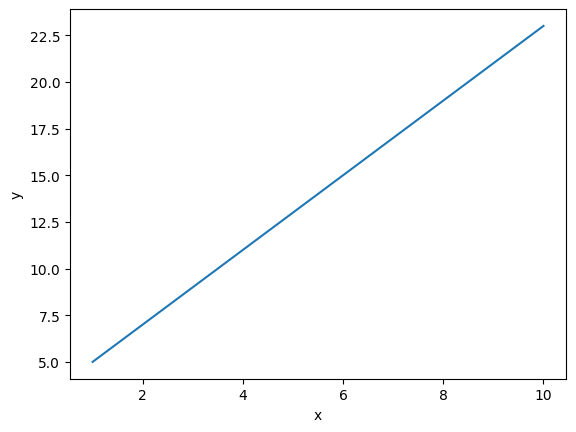

In [7]:
plt.plot(x,y)
plt.ylabel("y")
plt.xlabel("x")
plt.show()

Note the use of `plt.show`. It is best practice to call `show` whenever you want to display a plot to the screen.

We can also plot multiple lines on one plot with `plt.plot`. Simply call the function again or pass more arguments for more lines!

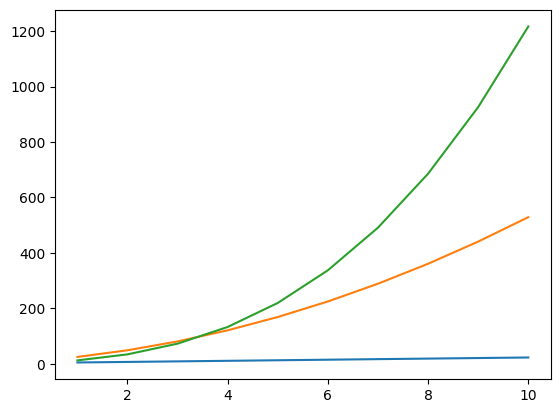

In [8]:
plt.plot(x,y)
plt.plot(x,y**2, x,0.1*y**3)
plt.show()

Not only can we plot multiple "lines" of data to a single figure, we can also use functions to generate the values we want.

Let's define a function $f(x)=(x-2)^3+3$ and plot the output of this with a single call to `plt.plot`.

In [9]:
def f(x):
    return (x-2)**3 + 3

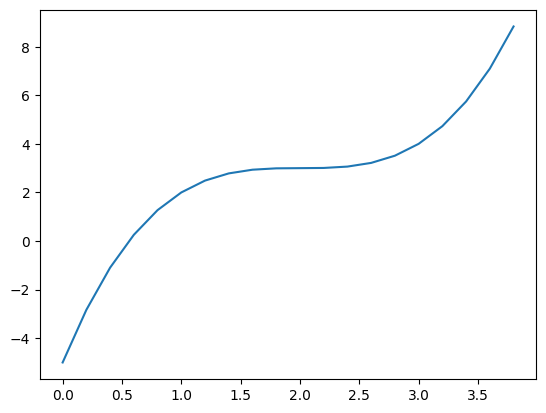

In [10]:
x_vals = np.arange(0., 4., 0.2)

plt.plot(x_vals,f(x_vals))
plt.show()

Matplotlib can be used to create scatter charts, histograms, and more! Examples and documentation can be found [here](https://matplotlib.org/stable/index.html)

## Lambda Functions

Another useful tool is a **lambda function**

Syntax: lambda *arguments* : *expression*

Use lambda functions when a simple function is required for a short period of time.

We can use a lambda function to reproduce the previous function `f(x)` given that only one expression needs to be evaluated.

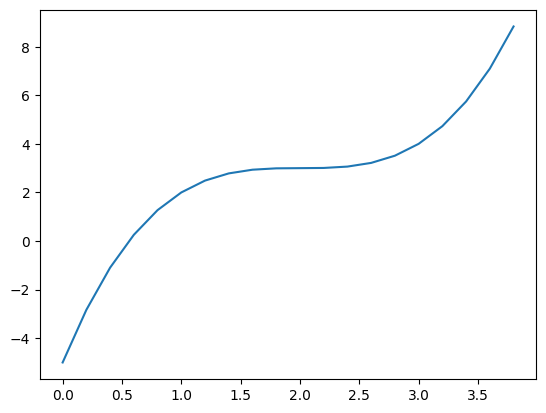

In [11]:
g = lambda x : (x-2)**3 + 3

plt.plot(x_vals, g(x_vals))
plt.show()

## Applying Functions to DataFrames
First, let's store `x_vals`, `f(x_vals)`, and `g(x_vals)` in a DataFrame with the appropriate column names:

In [12]:
my_df = pd.DataFrame(np.column_stack([x_vals, f(x_vals), g(x_vals)]), columns=["x_vals", "f(x)", "g(x)"])

Suppose we want to define a new function `h(x)` then calculate `h(x_vals)` and store the result in a new column. We define `h(x)` as a simple function below:

In [13]:
h = lambda x: x + 3

We can predict the expected output by looking at remembering what `x_vals` were stored in `my_df` by calling the column:

In [14]:
my_df.x_vals

0     0.0
1     0.2
2     0.4
3     0.6
4     0.8
5     1.0
6     1.2
7     1.4
8     1.6
9     1.8
10    2.0
11    2.2
12    2.4
13    2.6
14    2.8
15    3.0
16    3.2
17    3.4
18    3.6
19    3.8
Name: x_vals, dtype: float64

**Note**: accessing a single column like this will return it as a `pd.Series`. This is the Pandas equivalent of a vector.

Doing some quick math we expect that applying `h` to our x values should return `[3.0,  3.2,  3.4, ...]` etc.

The code below applies the function `h` to each element in our column `x_vals` then saves the result into a new column in `my_df` called `h(x)`:

In [15]:
my_df["h(x)"] = my_df["x_vals"].apply(h)

We can also check that our DataFrame has the new column as expected by either displaying the whole DataFrame or printing the list of column names:

In [17]:
display(my_df)
print(my_df.columns.to_list())

,x_vals,f(x),g(x),h(x)
0,0.0,-5.000,-5.000,3.0
1,0.2,-2.832,-2.832,3.2
2,0.4,-1.096,-1.096,3.4
3,0.6,0.256,0.256,3.6
4,0.8,1.272,1.272,3.8
5,1.0,2.000,2.000,4.0
6,1.2,2.488,2.488,4.2
7,1.4,2.784,2.784,4.4
8,1.6,2.936,2.936,4.6
9,1.8,2.992,2.992,4.8


['x_vals', 'f(x)', 'g(x)', 'h(x)']


**Note**: `df.columns` will return type Index. We can convert it to a list for a cleaner output by calling `to_list`.

## Plotting with Pandas

If you want to plot the data contained in a DataFrame, we can do so by calling `df.plot`, `df.plot.scatter` etc. This can be helpful if you want to index the data using the column names rather than having to call `df.x_column` and `df.y_column` separately. 

### Advantages
The built in plotting for DataFrames comes with some nice formatting including automated legends 

### Disadvantages
- Pandas only has options for the most common plot types (see list of options [here](https://pandas.pydata.org/docs/user_guide/visualization.html#visualization-scatter))
- `df.hist` can only handle numeric and datetime data, whereas matplotlib can handle categorical data too (see last example!)

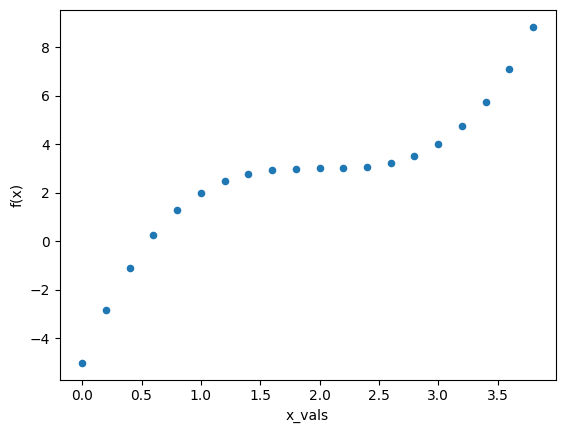

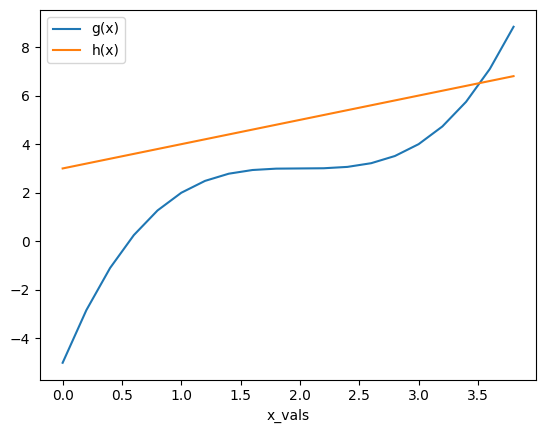

In [18]:
# Note: each call to plot using 
# pandas will create a new figure!
my_df.plot.scatter("x_vals", "f(x)")      # values from single columns on one plot
my_df.plot("x_vals", ["g(x)", "h(x)"])    # values from multiple columns on one plot
plt.show()

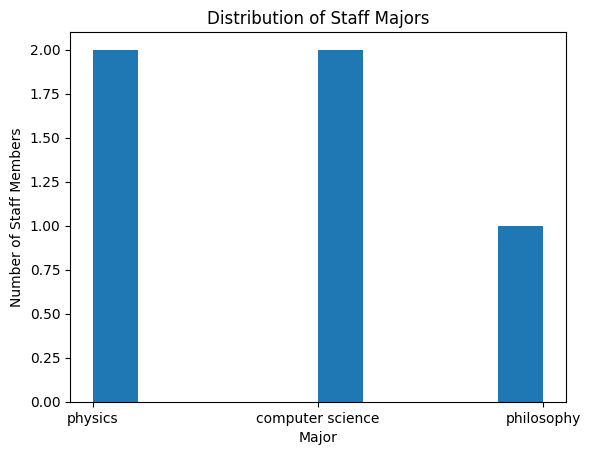

In [19]:
# This throws an error because the values in "major" are strings
# staff_data.hist("major") 

# matplotlib can handle string valued data
plt.hist(staff_data.major)
plt.title("Distribution of Staff Majors")
plt.ylabel("Number of Staff Members")
plt.xlabel("Major")
plt.show()